### **Anamoly Detection Module: Continuous Probabilistic Methods**

    created by: Mijail Q. Mariano

    191500AUG2022

----

In [1]:
# notebook dependencies
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 300

import pandas as pd
import numpy as np

# visualization libraries/modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from skimpy import clean_columns 

In [2]:
# 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas df. 
# The second argument is the multiplier, which should have a default argument of 1.5.

def get_lower_and_upper_bounds(df, k):

    # list that holder metrics returned in for loop 
    holder = []
    
    # creating a numbers/continuous variables list to iterate through
    num_lst = df.select_dtypes(include = "number").columns.tolist()

    for col in df[num_lst]:
    
        q1, q3 = df[col].quantile([0.25, 0.75])

        # calculating the interquartile range
        iqr = q3 - q1

        # identifying the df lower and upper bounds 
        lower_bound = q1 - k * iqr

        upper_bound = q3 + k * iqr

        metric = { 

            "Feature": col,
            "IQR": iqr, 
            "Lowerbound": round(lower_bound, 5),
            "Lower_outliers": len(df[df[col] < lower_bound]),
            "Upperbound": round(upper_bound, 5),
            "Upper_outliers": len(df[df[col] > upper_bound])
        }

        # appending metrics to the holder list
        holder.append(metric)

    df = pd.DataFrame(holder)

    # returning the df metrics
    return df

In [3]:
# caching the lemonade.csv file

df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv")
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
# cleaning column names

df = clean_columns(df)
df.head()

,date,day,temperature,rainfall,flyers,price,sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [5]:
# checking df information 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         365 non-null    object 
 1   day          365 non-null    object 
 2   temperature  365 non-null    float64
 3   rainfall     365 non-null    float64
 4   flyers       365 non-null    int64  
 5   price        365 non-null    float64
 6   sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [6]:
# describe and viewing the df range

summary_stats = df.describe().T
summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats

,count,mean,std,min,25%,50%,75%,max,range
temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0,196.9
rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5,2.1
flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0,118.0
price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5,0.0
sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0,527.0


In [7]:
# convert the sale date to proper DateTime
df["date"] = pd.to_datetime(df["date"], infer_datetime_format=True)
df.head()

,date,day,temperature,rainfall,flyers,price,sales
0,2017-01-01,Sunday,27.0,2.00,15,0.5,10
1,2017-01-02,Monday,28.9,1.33,15,0.5,13
2,2017-01-03,Tuesday,34.5,1.33,27,0.5,15
3,2017-01-04,Wednesday,44.1,1.05,28,0.5,17
4,2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [8]:
# setting the date column as df index 

df = df.set_index("date").rename_axis(None).sort_index()
df.head()

,day,temperature,rainfall,flyers,price,sales
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [9]:
# creating a month column 

df["month"] = df.index.strftime("%B")
df.head()

,day,temperature,rainfall,flyers,price,sales,month
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


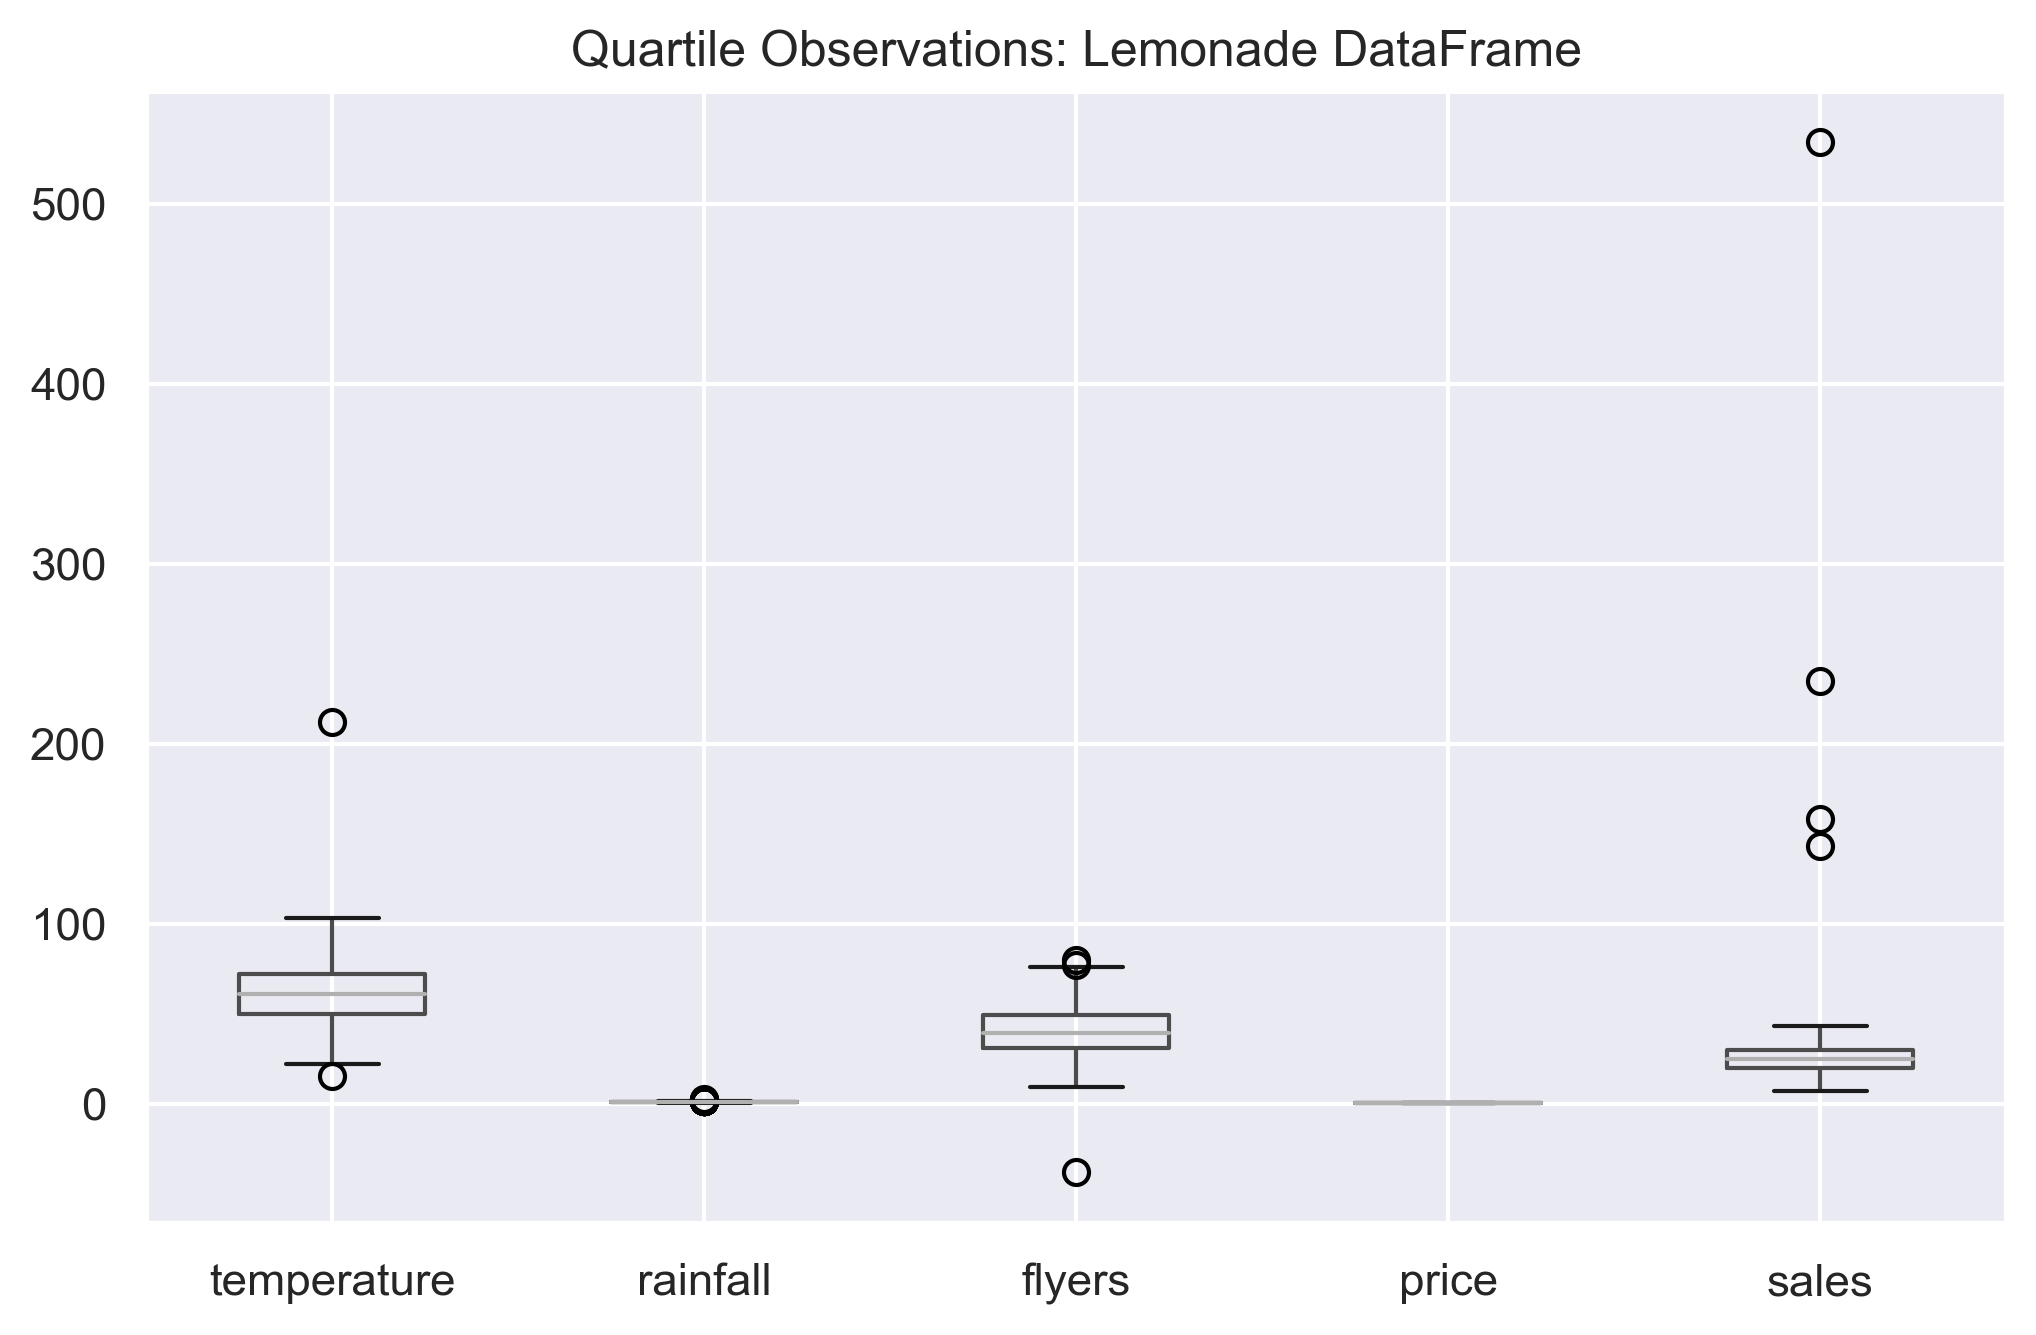

In [10]:
# plotting distribution of dataframe

plt.figure(figsize=(8, 5))
df.boxplot()

plt.title("Quartile Observations: Lemonade DataFrame")
plt.show()

In [11]:
# returning outlier dataframe 

get_lower_and_upper_bounds(df, 1.5)

,Feature,IQR,Lowerbound,Lower_outliers,Upperbound,Upper_outliers
0,temperature,22.00,16.70,1,104.7,1
1,rainfall,0.26,0.26,0,1.3,28
2,flyers,18.00,4.00,1,76.0,2
3,price,0.00,0.50,0,0.5,0
4,sales,10.00,5.00,0,45.0,4


In [12]:
# observations: at lower and upper bounds
# there appears to be only one (1) set "price" = $0.50
# rainfall at 28 observations over upperbound appears to be the "highest" number of outliers in the dataset
# lower_bounds for temp., rainfall, price, and sales appear may need further investigating
# consider keeping: temp., price, and sales outliers 

In [13]:
# Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. 
# Do these lower outliers make sense? Which outliers should be kept?

get_lower_and_upper_bounds(df, 3)

,Feature,IQR,Lowerbound,Lower_outliers,Upperbound,Upper_outliers
0,temperature,22.00,-16.30,0,137.70,1
1,rainfall,0.26,-0.13,0,1.69,4
2,flyers,18.00,-23.00,1,103.00,0
3,price,0.00,0.50,0,0.50,0
4,sales,10.00,-10.00,0,60.00,4


In [14]:
# observations: at lower and upper bounds
# with a fence of 3, flyers variable may be ommitted at the lower bound
# temp., rainfall, and sales will need to be further investigated before considering to handle outliers at upper bounds

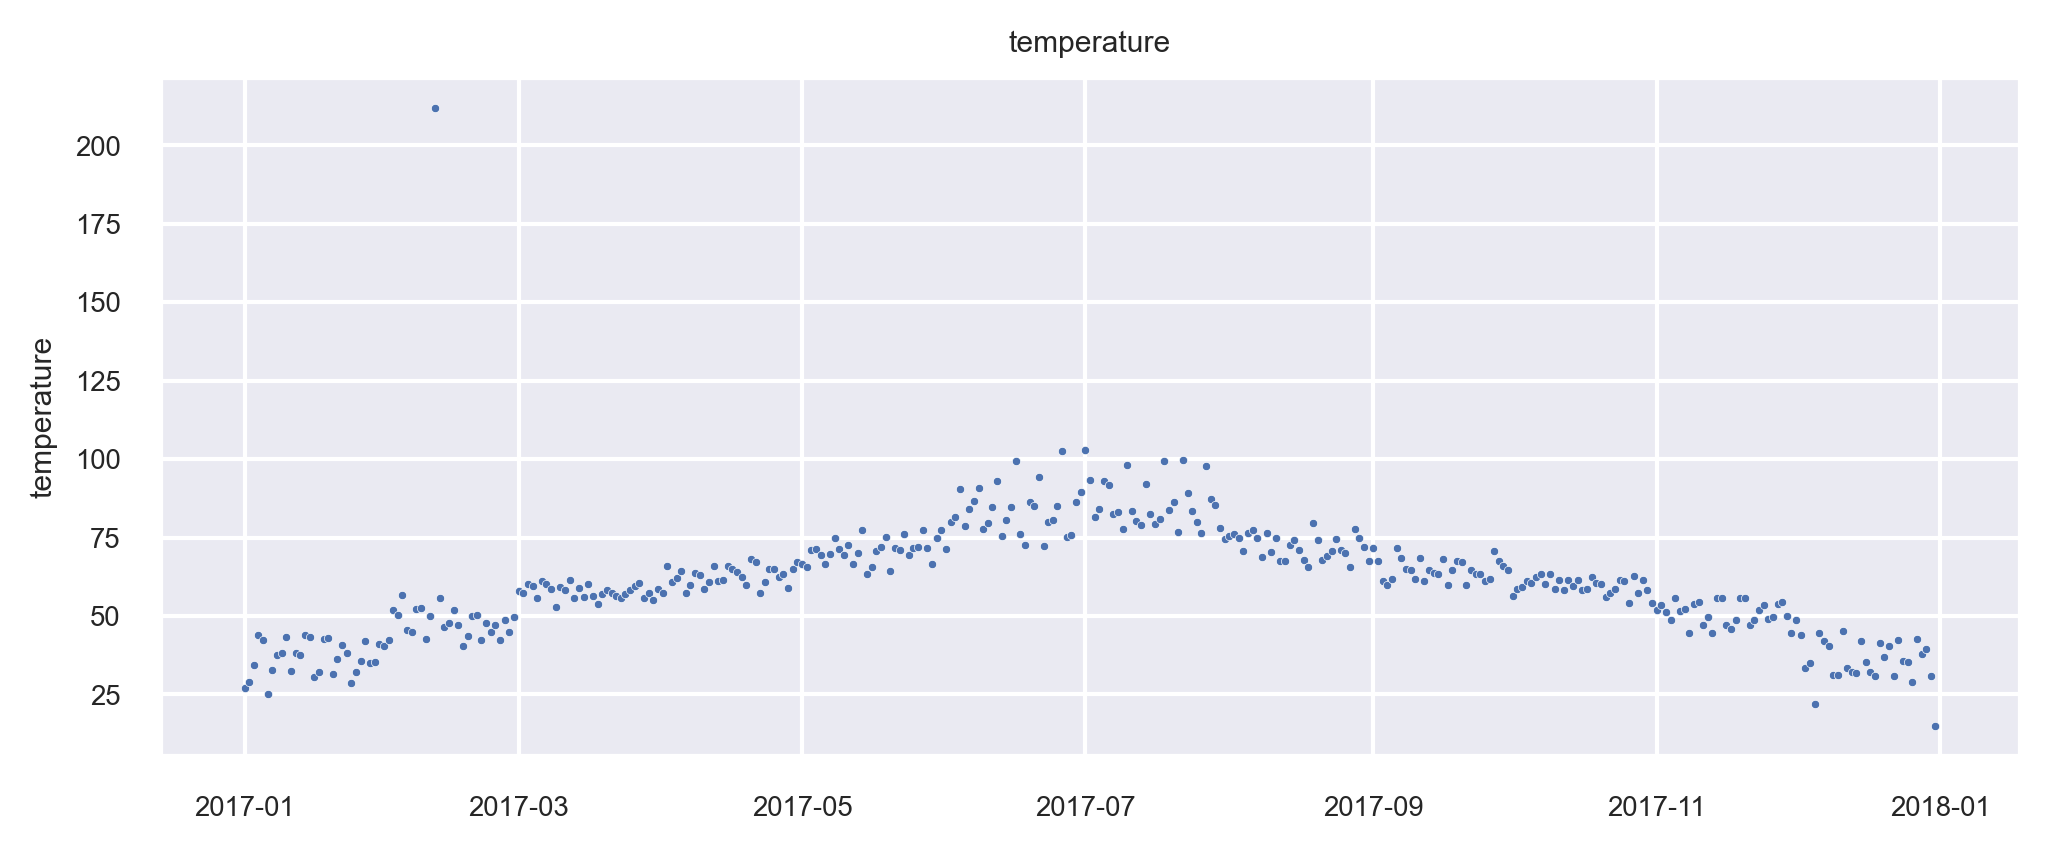

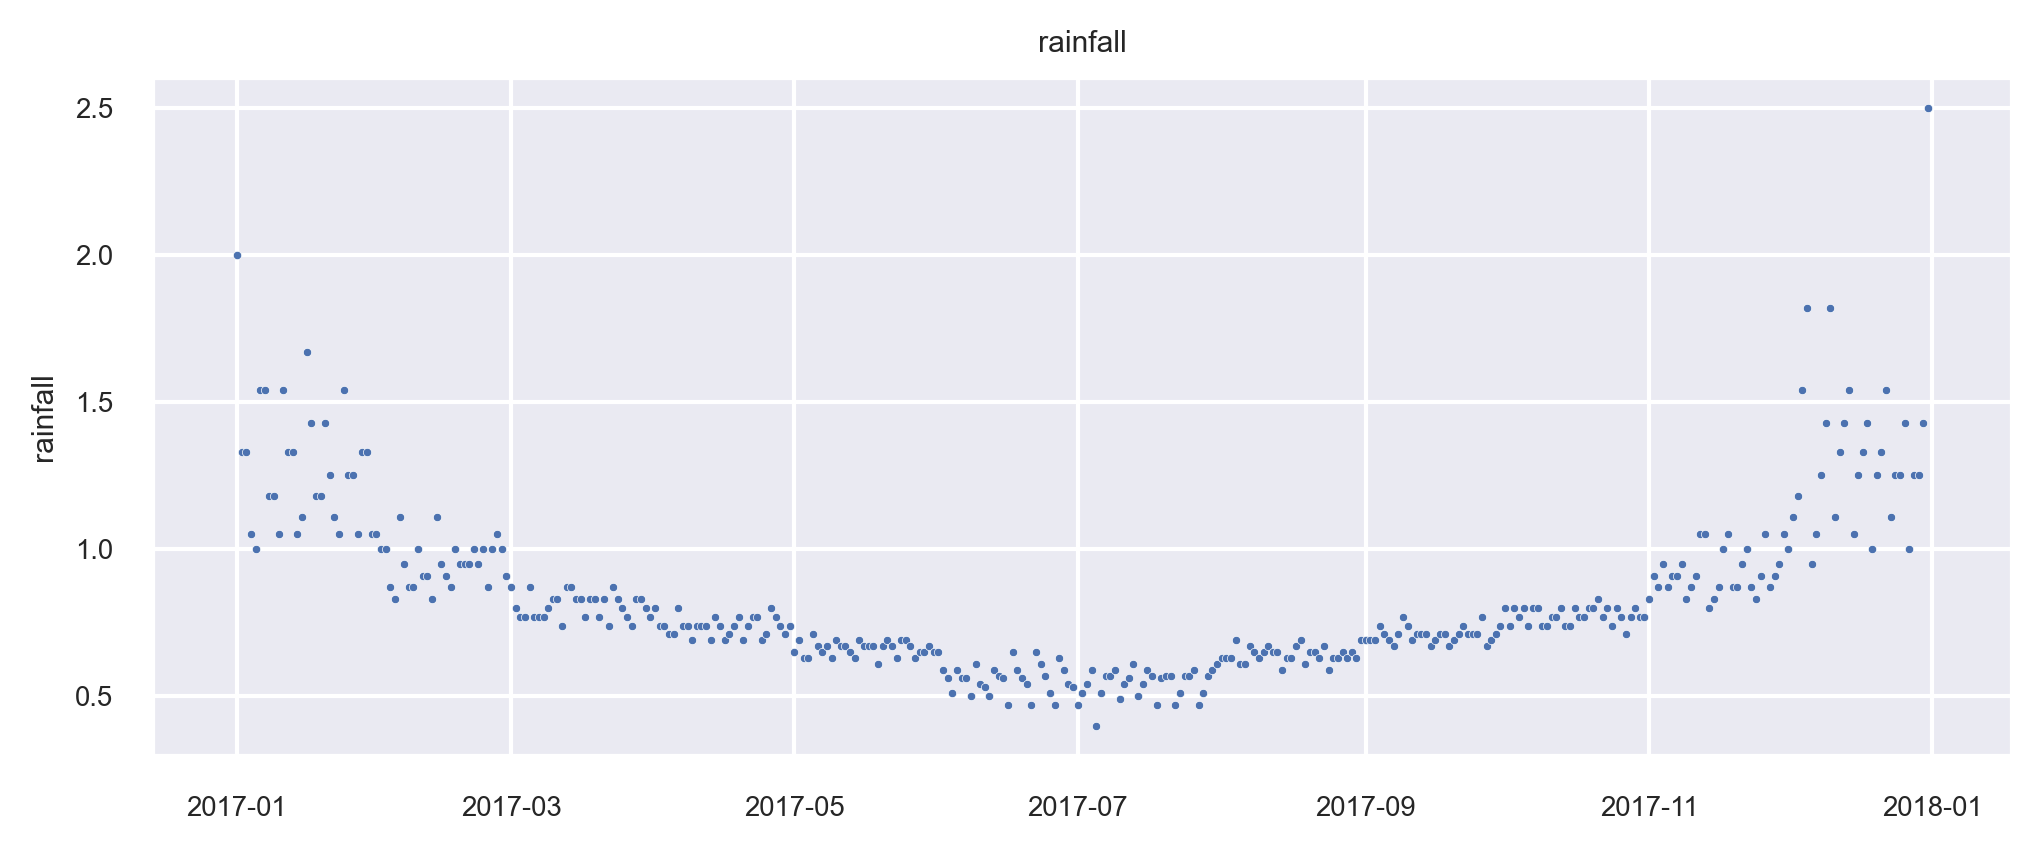

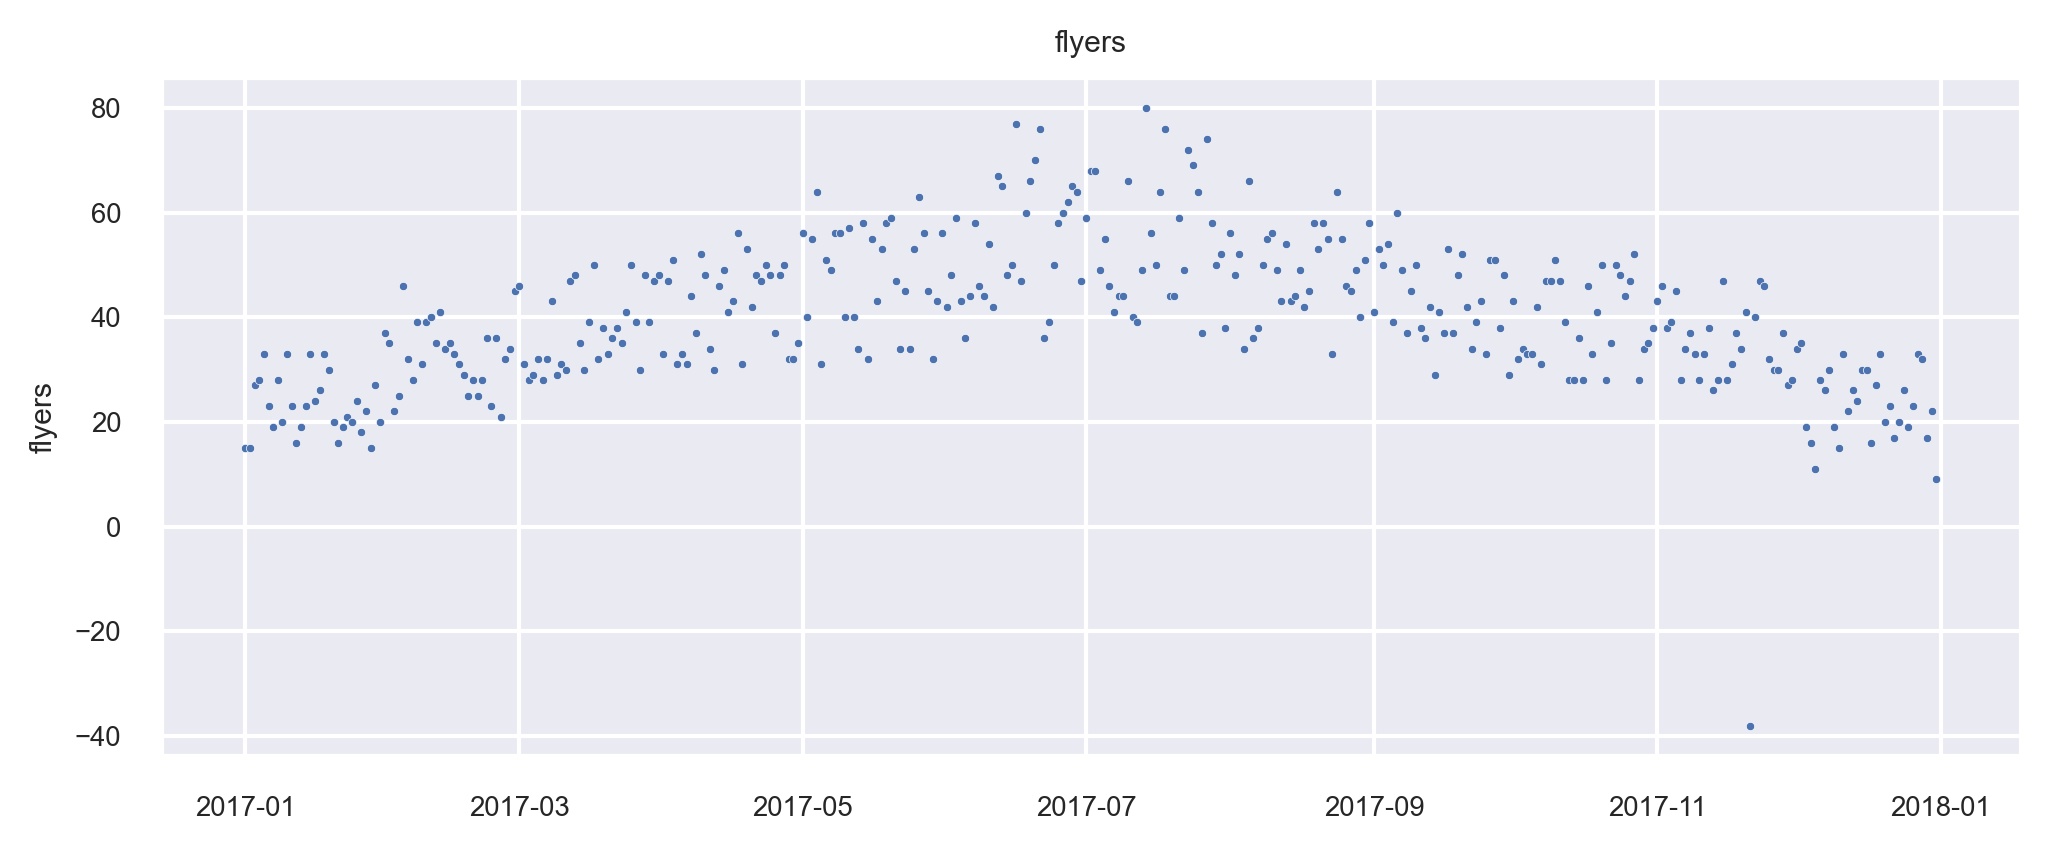

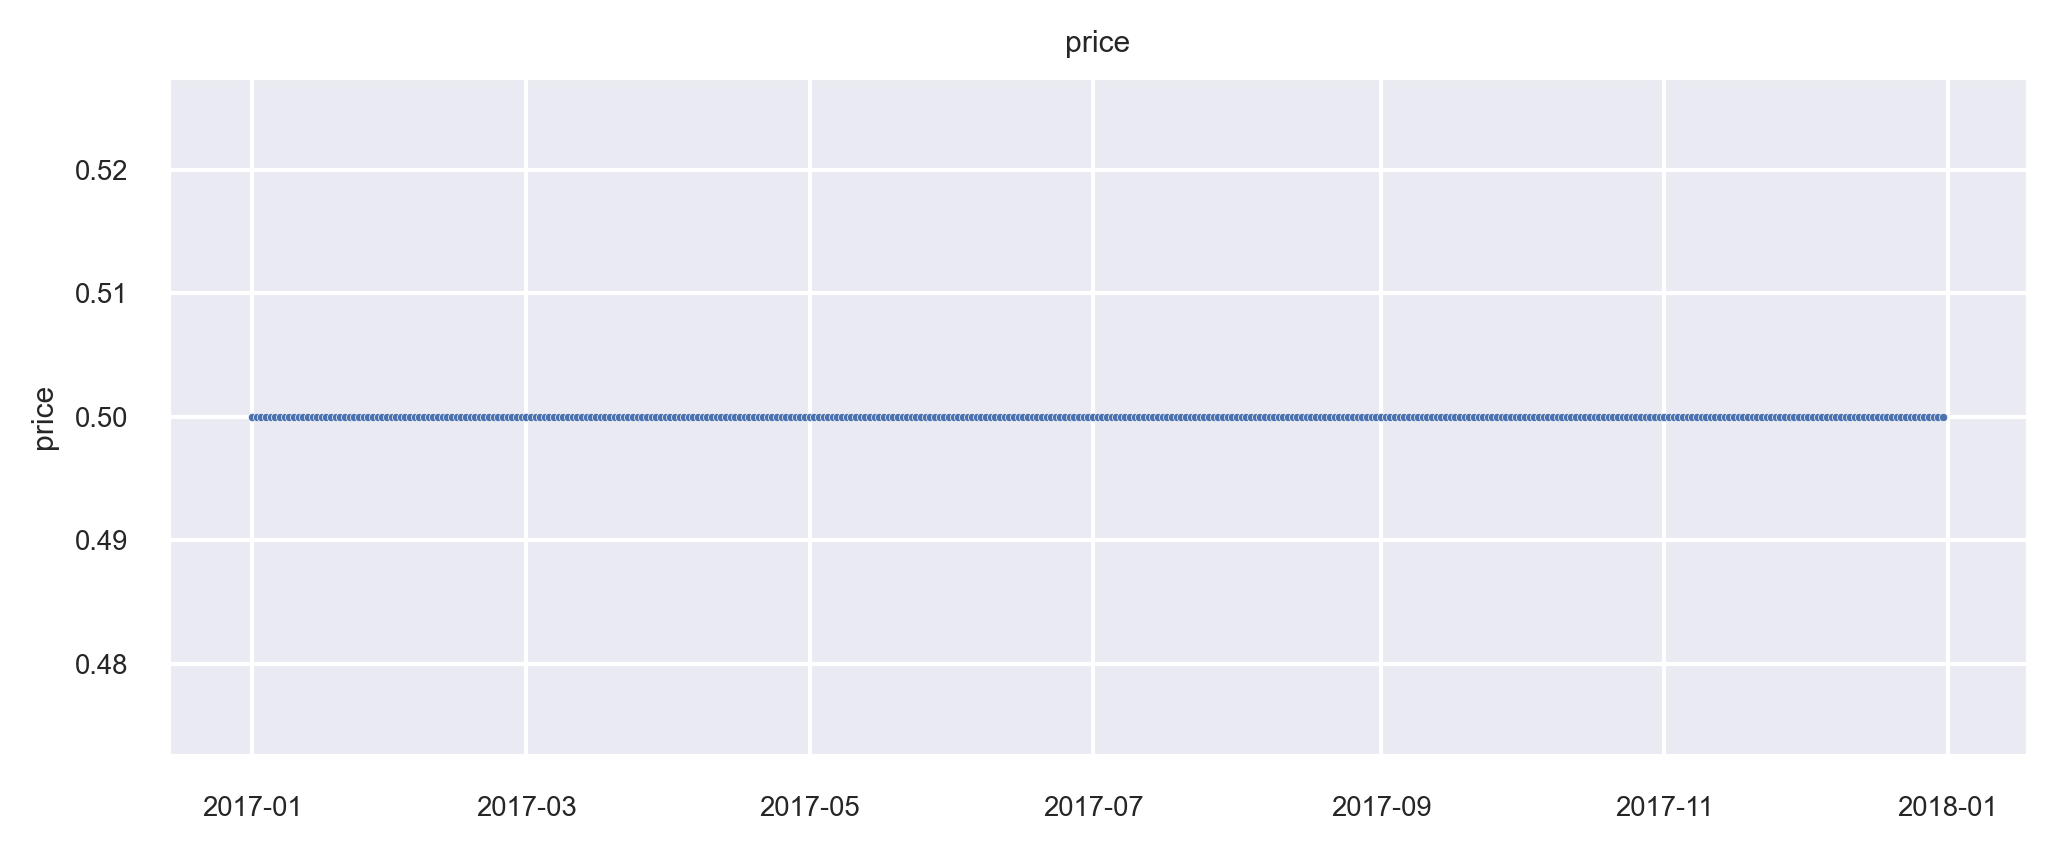

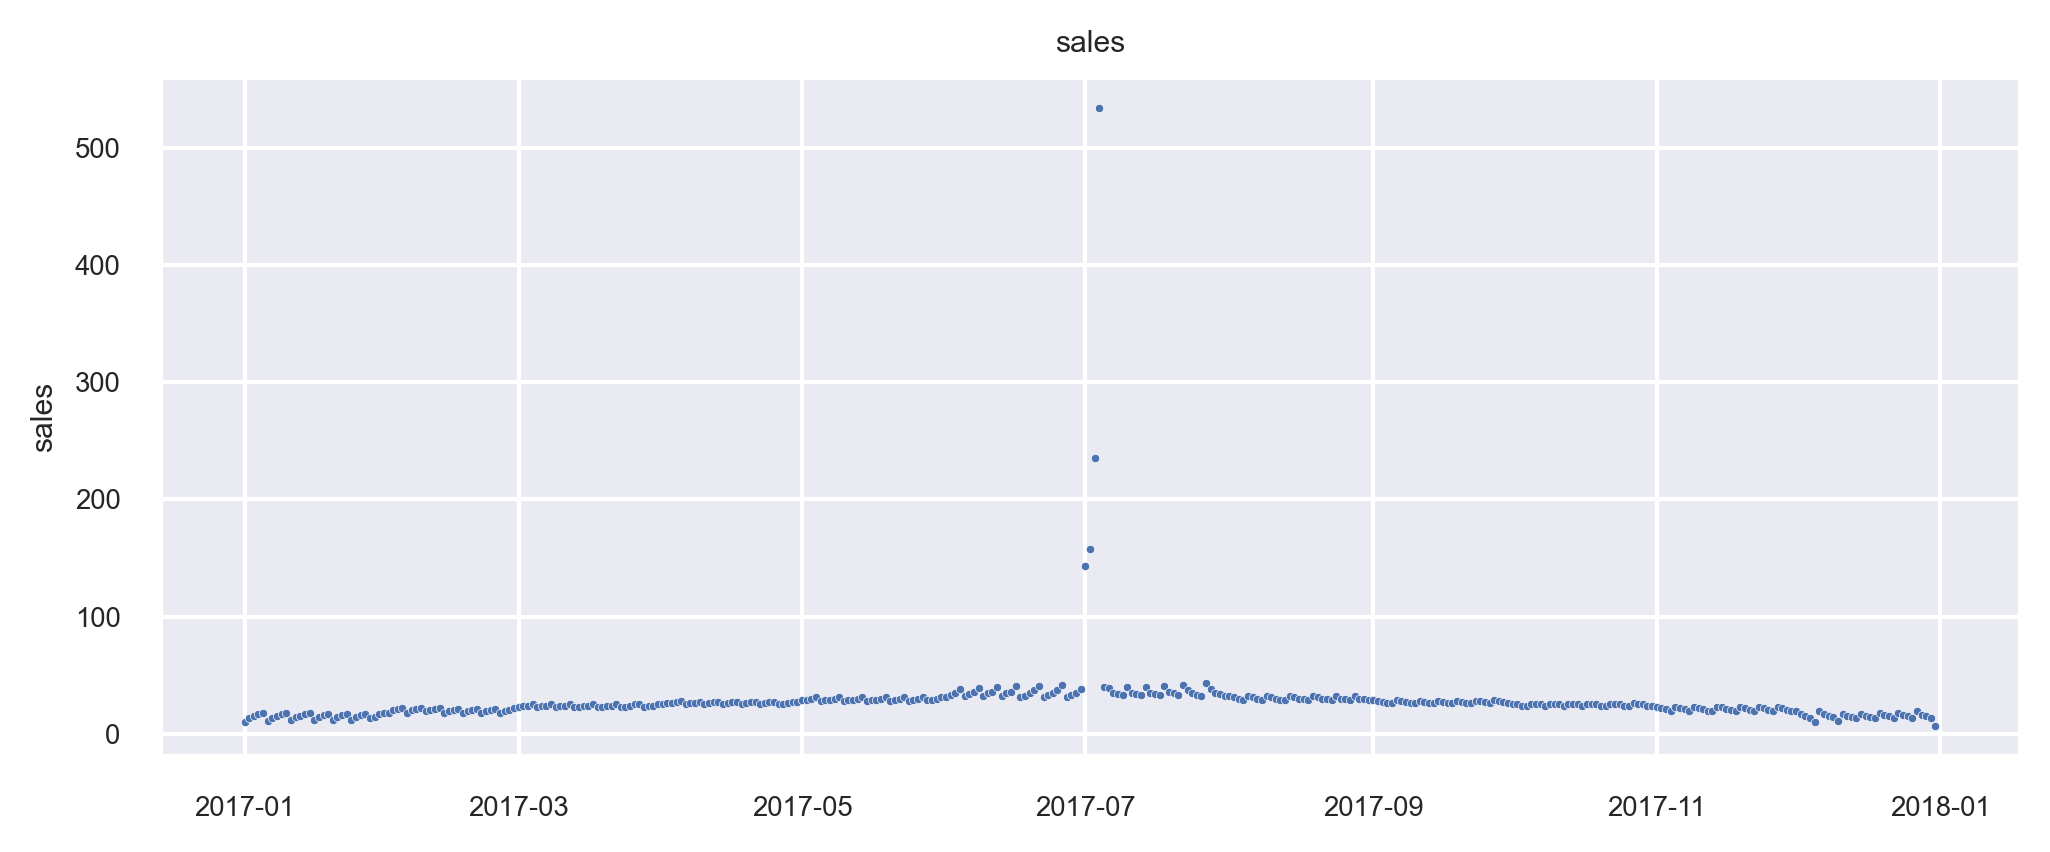

In [46]:
# plotting the variables/observations

for col in df.columns:
    if df[col].dtypes == "int" or df[col].dtypes == "float":
        plt.figure(figsize=(8, 3))

        sns.scatterplot(
            x = df.index, 
            y = df[col], 
            data = df,
            s = 4,
            x_jitter = 10)


        plt.title(col)
        plt.show()

----
### Exercise Number 2: Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

**Use a 2 sigma decision rule to isolate the outliers.**

* Do these make sense?
* Should certain outliers be kept or removed?

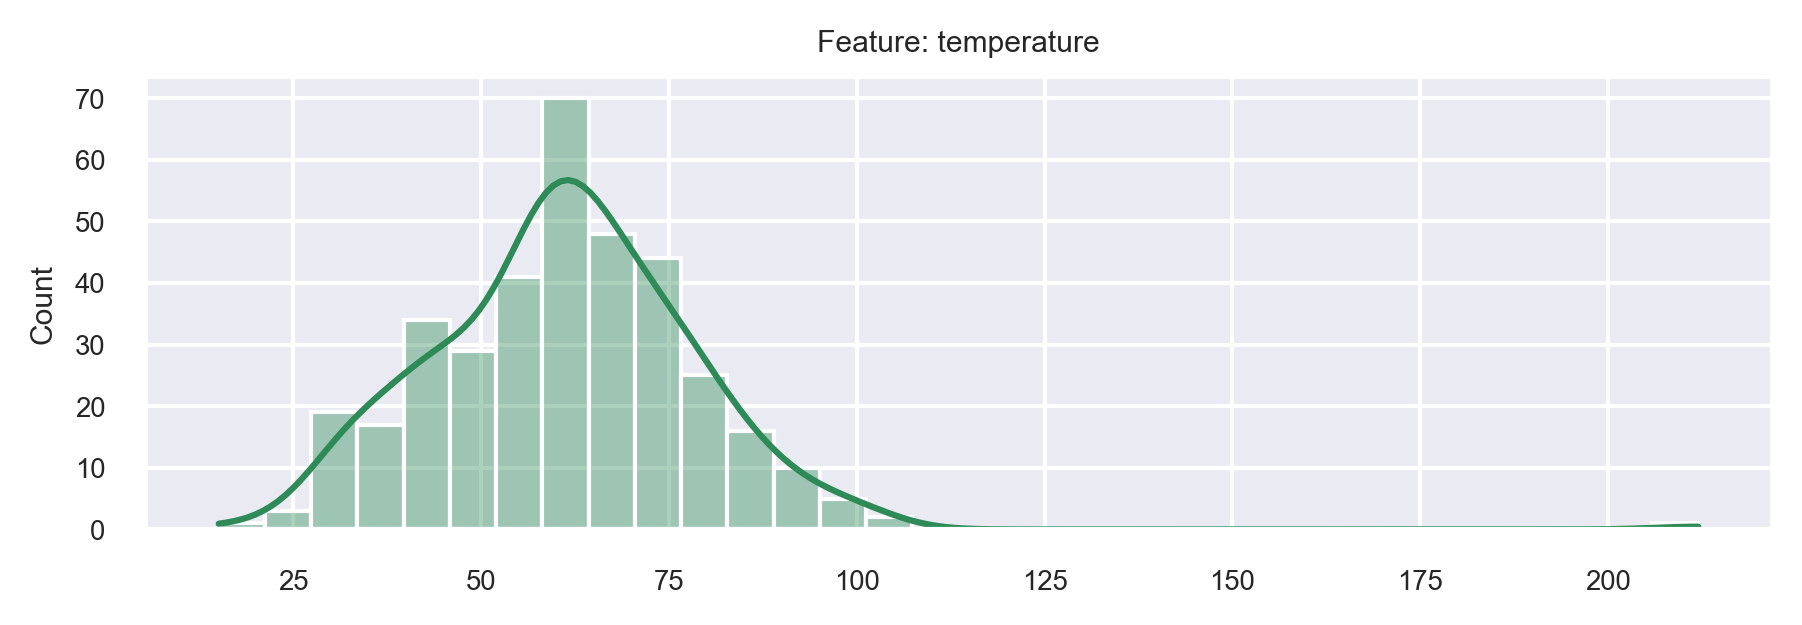

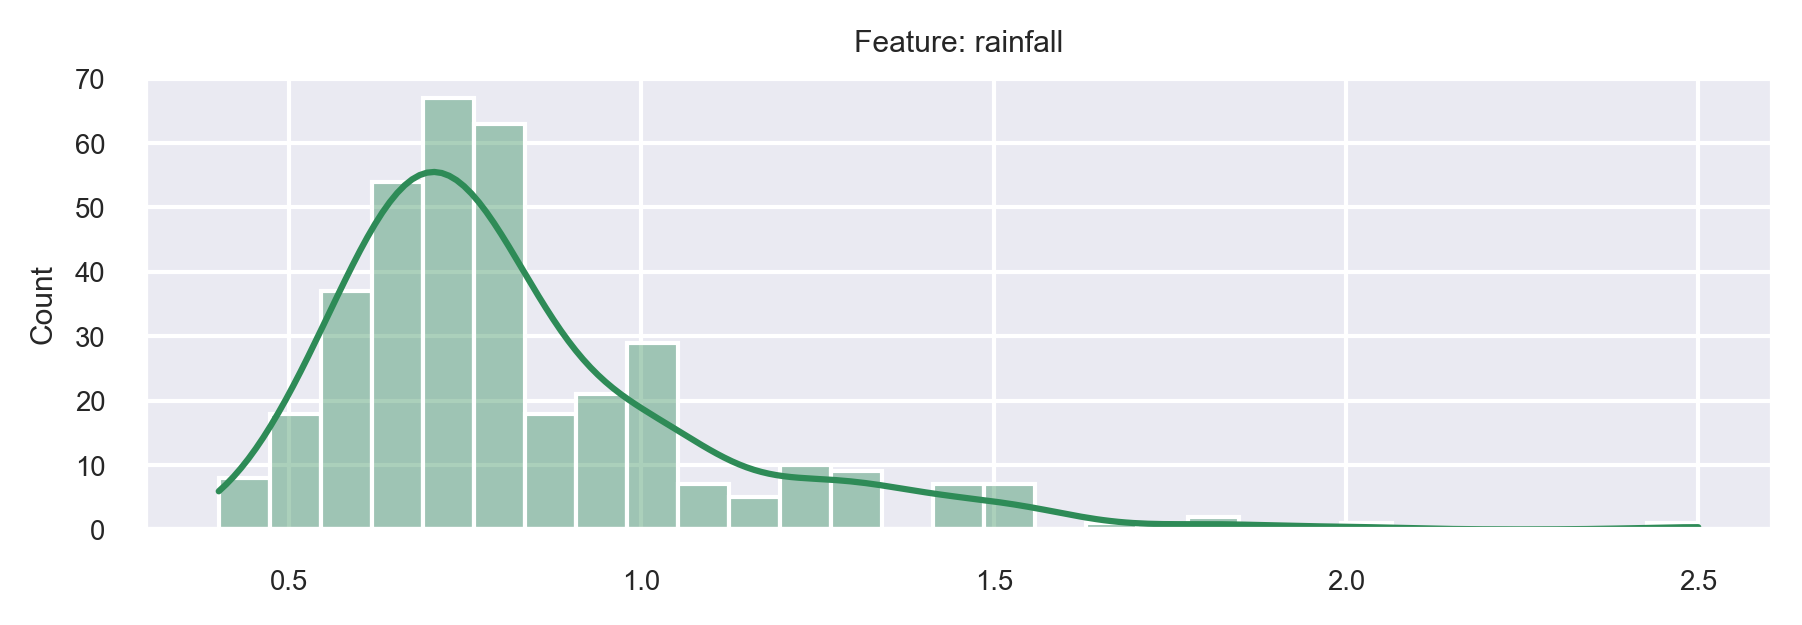

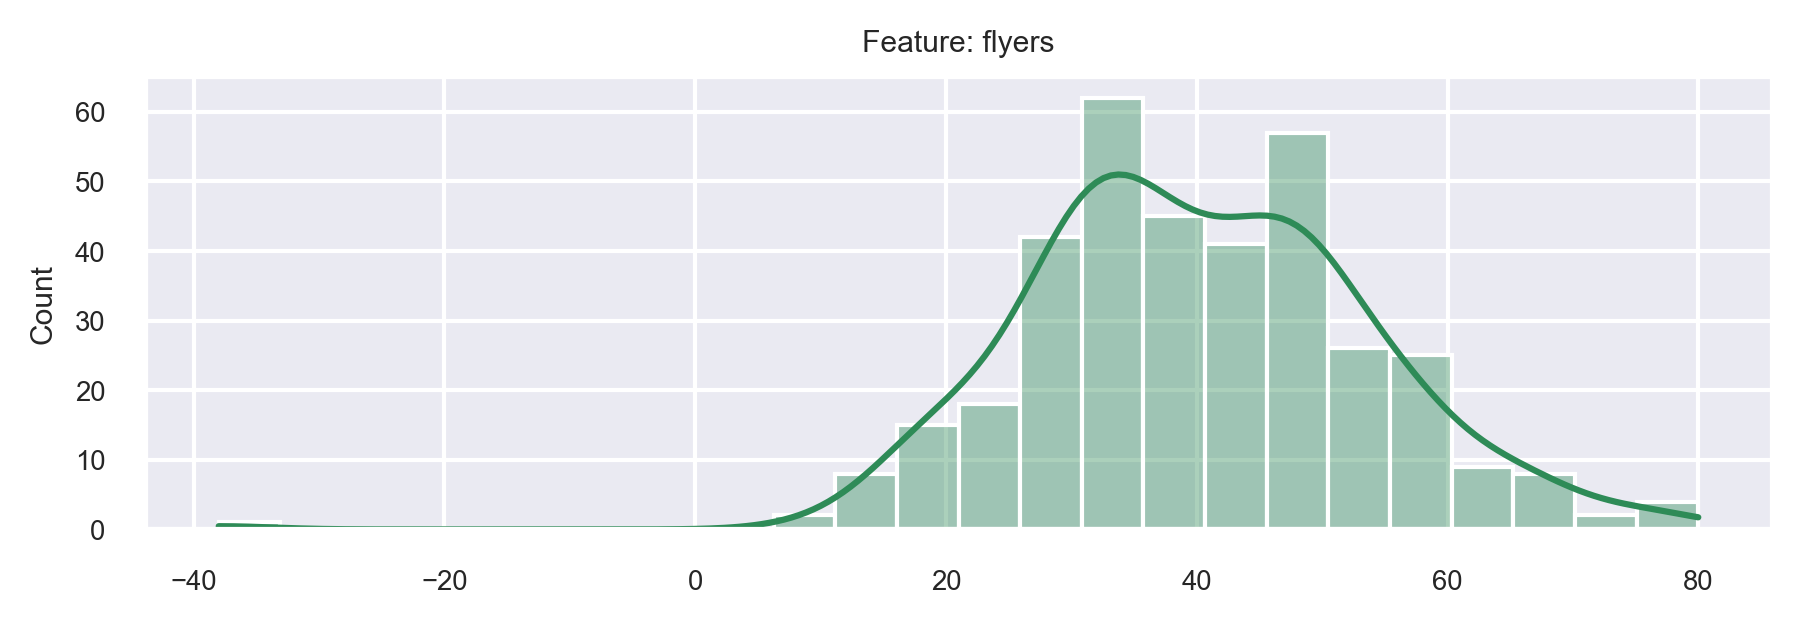

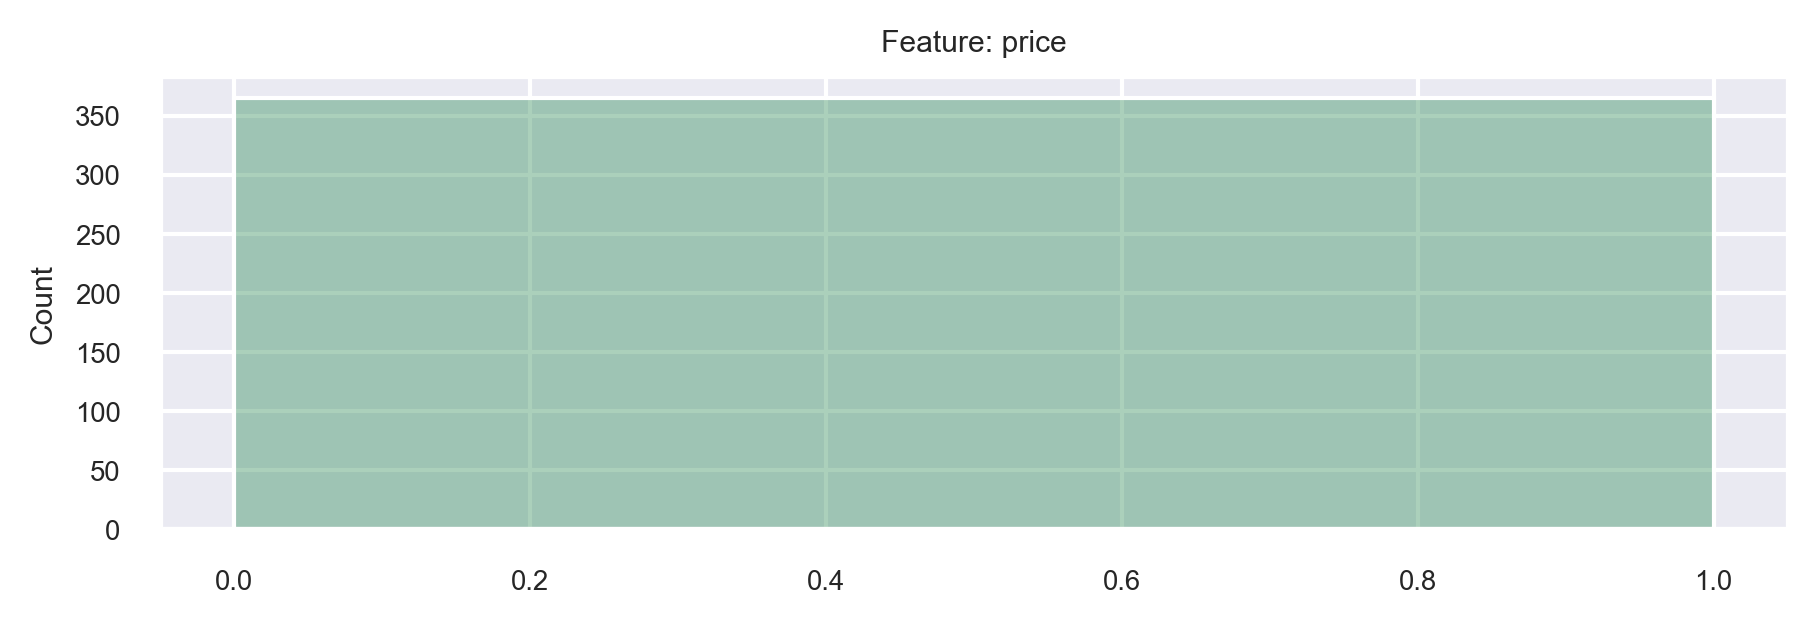

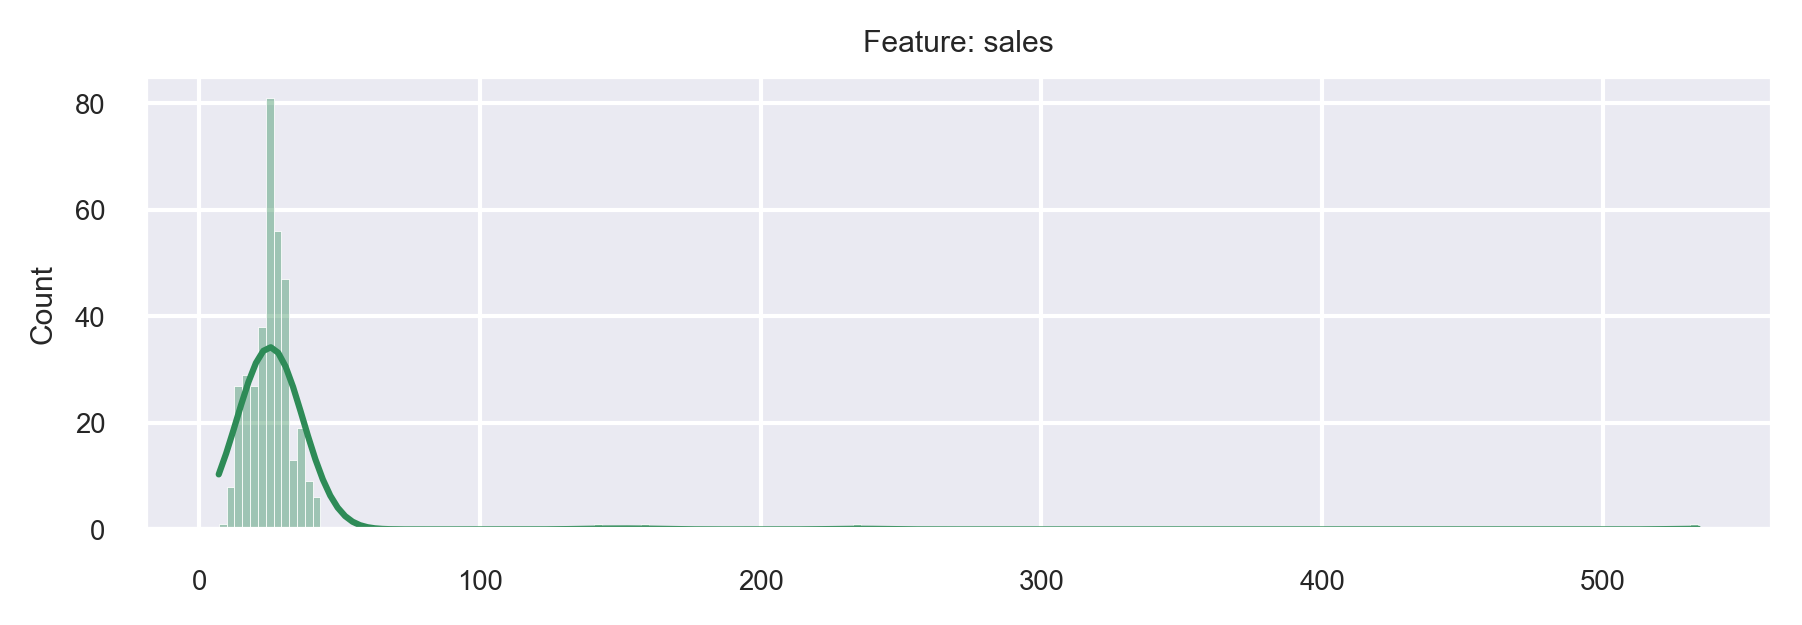

In [53]:
# histplot for continuous variables

# lst of columns to plot
num_lst = df.select_dtypes(include = "number").columns.tolist()

# plotting individual columns/features by data type
for col in df[num_lst]:

    plt.figure(figsize = (7, 2))
    sns.set(font_scale = 0.6)
    sns.histplot(
        df[col],
        color = "seagreen",
        alpha = 0.4,
        kde = True)

    plt.title(f'Feature: {col}')
    plt.xlabel(None)
    plt.show()

In [16]:
# calculating outliers for normally distributed features using Z-score

def sigma_outliers(series, sigma):
    # calcuate z-scores 
    zscores = pd.Series((series - series.mean())/ series.std())

    # identifying all outliers equal to or greater than 2 standard deviations from the mean
    outliers = series[zscores.abs() >= sigma]

    outliers = pd.DataFrame(outliers).rename(columns = {col: col+"_outlier_values"})

    return outliers

In [17]:
# temperature: seeing outliers at 2 standard deviations from mean

sigma_outliers(df["temperature"], 2)

,temperature
2017-02-11,212.0
2017-06-16,99.3
2017-06-26,102.6
2017-07-01,102.9
2017-07-10,98.0
2017-07-18,99.3
2017-07-22,99.6
2017-07-27,97.9
2017-12-05,22.0
2017-12-31,15.1


In [18]:
# temperature: seeing outliers at 3 standard deviations from mean

sigma_outliers(df["temperature"], 3)

,temperature
2017-02-11,212.0


In [19]:
# sales: seeing outliers at 2 standard deviations from mean

sigma_outliers(df["sales"], 2)

,sales_outlier_values
2017-07-01,143
2017-07-02,158
2017-07-03,235
2017-07-04,534


In [20]:
# sales: seeing outliers at 2 standard deviations from mean

sigma_outliers(df["sales"], 3)

,sales_outlier_values
2017-07-01,143
2017-07-02,158
2017-07-03,235
2017-07-04,534
